In [3]:
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.datasets import fetch_olivetti_faces
from numpy.random import RandomState

n_row, n_col = 2, 3  # 设置图像排列 2行3列
n_components = n_row * n_col   # 提取特征数目
image_shape = (64, 64)    # 设置人脸图片大小

dataset = fetch_olivetti_faces(shuffle=True, random_state=RandomState(0))
faces = dataset.data   # 加载数据并乱序


In [5]:
def plot_gallery(title, images, c_col=n_col, n_row=n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))   # 设置图片大小
    plt.suptitle(title, size=16)   # 设置标题及字号
 
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)     # 选择画的子图
        vmax = max(comp.max(), -comp.min())
 
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest', vmin=-vmax, vmax=vmax)  # 数值归一化，以灰度图显示
        plt.xticks(())
        plt.yticks(())    # 调整子图间隔， 去除子图坐标轴标签
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.94, 0.04)

In [6]:
estimators = [
    ('Eigenfaces - PCA using randomized SVD',
         decomposition.PCA(n_components=6,whiten=True)),
 
    ('Non-negative components - NMF',
         decomposition.NMF(n_components=6, init='nndsvda', tol=5e-3))
]
# 提取方法名称

Extracting the top 6 Eigenfaces - PCA using randomized SVD...
(400, 4096)
Extracting the top 6 Non-negative components - NMF...
(400, 4096)


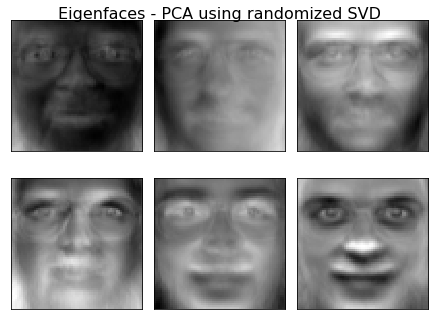

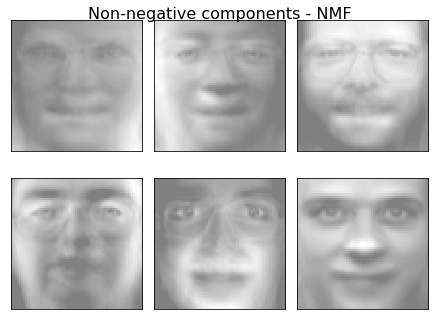

In [7]:
for name, estimator in estimators:    # 分别调用PCA和NMF
    print("Extracting the top %d %s..." % (n_components, name))
    print(faces.shape)
    estimator.fit(faces)  # 调用PCA或NMF提取特征
    components_ = estimator.components_
    plot_gallery(name, components_[:n_components])   # 获取提取的 特征按格式排列
 
plt.show()